In [24]:
import saspy
sas_session = saspy.SASsession()

Using SAS Config named: oda
SAS Connection established. Subprocess id is 3925



In [29]:
#     # read in the SAS macro from .txt file
with open('/Users/davydsadovskyy/PortfolioSite/flask_backend/macro.txt', 'r') as f:
    lines = f.readlines()
    macro = ''.join(lines)

In [30]:
gpt_macro_submit = sas_session.submit("""                 
%s
""" % format(macro))

In [31]:
gpt_plot_data_df = sas_session.sasdata2dataframe(table='y_values', libref='work')

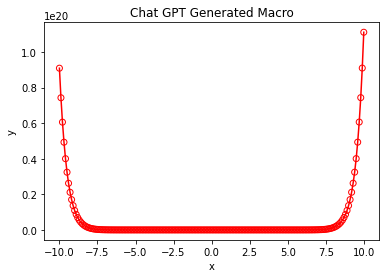

In [32]:
import matplotlib.pyplot as plt

# Assuming you have the x and y values from the SAS-generated graph
x = gpt_plot_data_df.x
y = gpt_plot_data_df.y

# Create the scatter plot
plt.scatter(x, y, color='red', marker='o', facecolors='none')

# Create the line plot
plt.plot(x, y, color='red')

# Set plot labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Chat GPT Generated Macro')

# Save the plot as an image file
plt.savefig('gpt_graph.png', dpi=300)

# Show the plot
plt.show()